In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_data_1 = pd.read_csv("hitter_stats_2015-2019.csv")
df_data_1.head()

dfwh = df_data_1

In [2]:
# The headers were taken from selecting all of the custom columns available here: https://baseballsavant.mlb.com/leaderboard/custom?year=2019,2018,2017,2016,2015&type=batter&filter=&sort=4&sortDir=desc&min=q&selections=xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,&chart=false&x=xba&y=xba&r=no&chartType=beeswarm
# I wanted to take in as much available data as possible to produce a more holistic picture of how the Astros may have benefitted from cheating
headers = ["last_name", "first_name", "year", "player_age", "b_ab", "b_total_pa", "b_total_hits", "b_single", "b_double", "b_triple", "b_home_run", "b_strikeout", "b_walk", "b_k_percent", "b_bb_percent", "batting_avg", "slg_percent", "on_base_percent", "on_base_plus_slg", "isolated_power", "b_rbi", "b_lob", "b_total_bases", "r_total_caught_stealing", "r_total_stolen_base", "b_ab_scoring", "b_ball", "b_called_strike", "b_catcher_interf", "b_foul", "b_foul_tip", "b_game", "b_gnd_into_dp", "b_gnd_into_tp", "b_gnd_rule_double", "b_hit_by_pitch", "b_hit_ground", "b_hit_fly", "b_hit_into_play", "b_hit_line_drive", "b_hit_popup", "b_out_fly", "b_out_ground", "b_out_line_drive", "b_out_popup", "b_intent_ball", "b_intent_walk", "b_interference", "b_pinch_hit", "b_pinch_run", "b_pitchout", "b_played_dh", "b_sac_bunt", "b_sac_fly", "b_swinging_strike", "r_caught_stealing_2b", "r_caught_stealing_3b", "r_caught_stealing_home", "r_defensive_indiff", "r_interference", "r_pickoff_1b", "r_pickoff_2b", "r_pickoff_3b", "r_run", "r_stolen_base_2b", "r_stolen_base_3b", "r_stolen_base_home", "b_total_ball", "b_total_sacrifices", "b_total_strike", "b_total_swinging_strike", "b_total_pitches", "r_stolen_base_pct", "r_total_pickoff", "b_reached_on_error", "b_walkoff", "b_reached_on_int", "xba", "xslg", "woba", "xwoba", "xobp", "xiso", "wobacon", "xwobacon", "bacon", "xbacon", "xbadiff", "xslgdiff", "wobadif", "exit_velocity_avg", "launch_angle_avg", "sweet_spot_percent", "barrels", "barrel_batted_rate", "solidcontact_percent", "flareburner_percent", "poorlyunder_percent", "poorlytopped_percent", "poorlyweak_percent", "hard_hit_percent", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent", "oz_contact_percent", "out_zone_swing_miss", "out_zone_swing", "out_zone_percent", "out_zone", "meatball_swing_percent", "meatball_percent", "pitch_count_offspeed", "pitch_count_fastball", "pitch_count_breaking", "pitch_count", "iz_contact_percent", "in_zone_swing_miss", "in_zone_swing", "in_zone_percent", "in_zone", "edge_percent", "edge", "whiff_percent", "swing_percent", "pull_percent", "straightaway_percent", "opposite_percent", "batted_ball", "f_strike_percent", "groundballs_percent", "groundballs", "flyballs_percent", "flyballs", "linedrives_percent", "linedrives", "popups_percent", "popups", "rel_league_reaction_distance", "rel_league_burst_distance", "rel_league_routing_distance", "rel_league_bootup_distance", "f_bootup_distance", "n_bolts", "hp_to_1b", "sprint_speed", "?"]
dfwh.columns = headers

In [3]:
dfwh.dtypes

last_name                        object
first_name                       object
year                              int64
player_age                        int64
b_ab                              int64
b_total_pa                        int64
b_total_hits                      int64
b_single                          int64
b_double                          int64
b_triple                          int64
b_home_run                        int64
b_strikeout                       int64
b_walk                            int64
b_k_percent                     float64
b_bb_percent                    float64
batting_avg                     float64
slg_percent                     float64
on_base_percent                 float64
on_base_plus_slg                float64
isolated_power                  float64
b_rbi                             int64
b_lob                             int64
b_total_bases                     int64
r_total_caught_stealing           int64
r_total_stolen_base               int64


In [4]:
dfwh

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_catcher_interf,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_intent_walk,b_interference,b_pinch_hit,b_pinch_run,b_pitchout,b_played_dh,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_defensive_indiff,r_interference,r_pickoff_1b,r_pickoff_2b,r_pickoff_3b,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_sacrifices,b_total_strike,b_total_swinging_strike,b_total_pitches,r_stolen_base_pct,r_total_pickoff,b_reached_on_error,b_walkoff,b_reached_on_int,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups,rel_league_reaction_distance,rel_league_burst_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,n_bolts,hp_to_1b,sprint_speed,?
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,0,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,0,0,0,0,0,0,4,1,31,0,0,0,0,0,0,0,0,2,0,0,0,31,5,155,108,186,NaN,0,1,0,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,20.2,NaN
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,0,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,1,0,4,0,0,14,0,5,258,4,0,1,1,0,0,1,0,67,2,0,0,695,5,1392,1115,2087,NaN,1,4,0,0,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.5,NaN
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,0,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,16,0,3,0,0,134,0,9,258,0,1,0,0,0,0,1,0,73,0,0,0,1037,9,1451,1112,2488,NaN,1,5,0,0,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23.1,NaN
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,0,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,5,0,12,0,0,136,0,7,352,0,0,0,1,0,0,0,0,83,4,0

In [5]:
dfwh.isnull().sum()

last_name                          0
first_name                         0
year                               0
player_age                         0
b_ab                               0
b_total_pa                         0
b_total_hits                       0
b_single                           0
b_double                           0
b_triple                           0
b_home_run                         0
b_strikeout                        0
b_walk                             0
b_k_percent                        0
b_bb_percent                       0
batting_avg                        0
slg_percent                        0
on_base_percent                    0
on_base_plus_slg                   0
isolated_power                     0
b_rbi                              0
b_lob                              0
b_total_bases                      0
r_total_caught_stealing            0
r_total_stolen_base                0
b_ab_scoring                       0
b_ball                             0
b

In [6]:
# Gets rid of missing data. This is a small loss since intuition says that the following stats stand to gain little to nothing from the Astros' cheating scheme
dfwh = dfwh.drop(["?","r_stolen_base_pct","rel_league_reaction_distance","rel_league_burst_distance","rel_league_routing_distance","rel_league_bootup_distance","f_bootup_distance","n_bolts","hp_to_1b","sprint_speed"], axis=1)
dfwh.dropna(subset=["meatball_swing_percent"],axis=0,inplace=True)
dfwh.dropna(subset=["oz_swing_miss_percent"],axis=0,inplace=True)
dfwh.dropna(subset=["oz_contact_percent"],axis=0,inplace=True)

In [7]:
dfwh.isnull().sum()

last_name                  0
first_name                 0
year                       0
player_age                 0
b_ab                       0
b_total_pa                 0
b_total_hits               0
b_single                   0
b_double                   0
b_triple                   0
b_home_run                 0
b_strikeout                0
b_walk                     0
b_k_percent                0
b_bb_percent               0
batting_avg                0
slg_percent                0
on_base_percent            0
on_base_plus_slg           0
isolated_power             0
b_rbi                      0
b_lob                      0
b_total_bases              0
r_total_caught_stealing    0
r_total_stolen_base        0
b_ab_scoring               0
b_ball                     0
b_called_strike            0
b_catcher_interf           0
b_foul                     0
b_foul_tip                 0
b_game                     0
b_gnd_into_dp              0
b_gnd_into_tp              0
b_gnd_rule_dou

In [8]:
# Since I had a lot of different stats, for practical and computational reasons, it was necessary and advisable to drop some of the stats that intuition says would be unimpacted by prior knowledge of what pitch was coming
dfwh = dfwh.drop(["b_catcher_interf","b_intent_walk","b_interference","b_pinch_hit","b_pinch_run","b_pitchout","b_played_dh","r_defensive_indiff","r_interference","r_pickoff_1b","r_pickoff_2b","r_pickoff_3b","r_run","b_total_sacrifices","b_reached_on_error","b_walkoff","b_reached_on_int"], axis=1)

In [9]:
#Get rid of players with less than 100 PA in order to not pollute averaged stats like BA, SLUG, etc with outliers. It would have been nice to drop pitchers outright here, but there is no position column available from the data set, and most pitchers have fewer than 100 PA's in a season, so the majority of them are covered by this anyways.
dfwh.drop(dfwh[dfwh.b_total_pa < 10].index, inplace=True)

In [10]:
dfwh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 0 to 3594
Columns: 120 entries, last_name to popups
dtypes: float64(51), int64(67), object(2)
memory usage: 3.5+ MB


In [11]:
dfwh.describe(include="all")

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
count,3584,3584,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.00000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000
unique,1033,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Garcia,Matt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
dfwh.shape

(3584, 120)

In [13]:
astro_hitters = pd.DataFrame(columns=dfwh.columns)
mlb_hitters = dfwh

In [14]:
#Add astro hitters to their own data frame
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Rasmus'].loc[dfwh['first_name'] == ' Colby'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Valbuena'].loc[dfwh['first_name'] == ' Luis'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Carter'].loc[dfwh['first_name'] == ' Chris'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Castro'].loc[dfwh['first_name'] == ' Jason'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Preston'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Conger'].loc[dfwh['first_name'] == ' Hank'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Lowrie'].loc[dfwh['first_name'] == ' Jed'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Villar'].loc[dfwh['first_name'] == ' Jonathan'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gomez'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Grossman'].loc[dfwh['first_name'] == ' Robbie'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Singleton'].loc[dfwh['first_name'] == ' Jon'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Santana'].loc[dfwh['first_name'] == ' Domingo'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Rasmus'].loc[dfwh['first_name'] == ' Colby'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Valbuena'].loc[dfwh['first_name'] == ' Luis'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Castro'].loc[dfwh['first_name'] == ' Jason'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Preston'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gomez'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reed'].loc[dfwh['first_name'] == ' AJ'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Hernandez'].loc[dfwh['first_name'] == ' Teoscar'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Worth'].loc[dfwh['first_name'] == ' Danny'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kratz'].loc[dfwh['first_name'] == ' Erik'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Beltran'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'McCann'].loc[dfwh['first_name'] == ' Brian'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Aoki'].loc[dfwh['first_name'] == ' Norichika'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Davis'].loc[dfwh['first_name'] == ' J.D.'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Centeno'].loc[dfwh['first_name'] == ' Juan'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maybin'].loc[dfwh['first_name'] == ' Cameron'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'McCann'].loc[dfwh['first_name'] == ' Brian'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Davis'].loc[dfwh['first_name'] == ' J.D.'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maldonado'].loc[dfwh['first_name'] == ' Martin'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Kyle'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Federowicz'].loc[dfwh['first_name'] == ' Tim'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Straw'].loc[dfwh['first_name'] == ' Myles'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maldonado'].loc[dfwh['first_name'] == ' Martin'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Kyle'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Straw'].loc[dfwh['first_name'] == ' Myles'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Brantley'].loc[dfwh['first_name'] == ' Michael'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Chirinos'].loc[dfwh['first_name'] == ' Robinson'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Alvarez'].loc[dfwh['first_name'] == ' Yordan'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Diaz'].loc[dfwh['first_name'] == ' Aledmys'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Mayfield'].loc[dfwh['first_name'] == ' Jack'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Toro'].loc[dfwh['first_name'] == ' Abraham'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stubbs'].loc[dfwh['first_name'] == ' Garrett'].loc[dfwh['year'] == 2019], ignore_index = True)


astro_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Altuve,Jose,2015,25,638,689,200,141,40,4,15,67,33,9.7,4.8,0.313,0.459,0.351,0.810,0.146,66,207,293,13,38,111,662,331,434,9,154,17,0,3,9,95,18,580,85,2,108,198,51,40,30,3,6,130,11,2,0,31,7,0,745,1482,1151,2227,8,0.273,0.390,0.347,0.305,0.317,0.116,0.367,0.317,0.347,0.305,0.040,0.069,0.042,85.8,10.5,31.6,18,3.1,4.8,24.0,26.7,36.4,5.0,28.8,70.5,6.6,34.1,20.3,79.7,81,399,52.5,1170,80.4,7.3,200,1385,587,2227,93.4,49,745,47.5,1057,39.9,889,11.4,51.4,39.8,40.9,19.3,580,39.6,47.6,276,21.7,126,23.4,136,7.2,42
1,Altuve,Jose,2016,26,640,717,216,145,42,5,24,70,60,9.8,8.4,0.338,0.531,0.395,0.926,0.194,96,202,340,10,30,137,836,351,432,16,161,15,0,2,7,73,23,580,120,0,106,194,54,25,38,3,7,184,7,3,0,22,8,0,921,1553,1202,2474,4,0.324,0.528,0.391,0.391,0.386,0.201,0.408,0.409,0.374,0.362,0.014,0.003,0.000,87.5,10.9,39.7,40,6.9,6.6,29.8,20.5,31.7,4.5,36.2,70.0,10.3,30.5,24.9,75.1,103,413,54.8,1355,78.8,6.7,282,1437,674,2474,89.7,81,783,45.2,1118,41.2,1018,15.4,48.3,39.3,41.2,19.5,580,40.3,43.4,252,22.2,129,30.0,174,4.3,25
2,Altuve,Jose,2017,27,590,662,204,137,39,4,24,84,58,12.7,8.8,0.346,0.547,0.409,0.957,0.202,81,215,323,6,32,132,763,372,403,19,153,19,0,3,9,87,34,511,83,0,75,179,46,26,0,1,4,185,6,0,0,23,9,0,832,1476,1104,2308,4,0.303,0.494,0.405,0.376,0.373,0.185,0.435,0.397,0.400,0.352,0.043,0.053,0.029,85.5,9.1,34.6,34,6.7,4.9,25.8,20.5,35.0,7.0,27.6,67.5,10.0,31.7,27.8,72.2,113,407,55.7,1282,71.5,6.6,249,1294,758,2308,90.0,69,688,44.3,1019,41.3,950,16.8,47.6,36.2,38.2,25.6,511,42.0,48.3,247,21.3,109,25.2,129,5.1,26
3,Altuve,Jose,2018,28,534,599,169,125,29,2,13,79,55,13.2,9.2,0.316,0.451,0.384,0.835,0.135,61,204,241,4,17,115,714,347,365,15,137,17,0,3,6,69,24,459,76,0,79,169,41,18,0,3,1,180,4,0,0,14,3,0,769,1354,1007,2123,2,0.296,0.459,0.364,0.358,0.368,0.159,0.385,0.378,0.371,0.347,0.020,-0.008,0.006,86.3,9.5,34.0,27,5.9,5.2,24.8,22.0,36.2,5.9,33.8,67.8,11.6,30.0,29.9,70.1,103,345,54.2,1149,75.2,6.8,264,1249,601,2123,88.4,76,658,45.8,970,42.9,909,17.9,47.3,34.0,45.3,20.7,459,44.4,48.1,221,22.4,103,25.5,117,3.9,18
4,Altuve,Jose,2019,29,500,548,149,88,27,3,31,82,41,15.0,7.5,0.298,0.550,0.352,0.902,0.252,74,182,275,5,6,94,673,320,318,15,124,19,0,0,3,60,34,422,54,1,58,154,29,32,0,1,3,194,4,1,0,4,2,0,724,1270,950,1994,1,0.282,0.492,0.374,0.350,0.339,0.208,0.414,0.383,0.354,0.336,0.016,0.058,0.024,86.1,8.8,29.4,34,8.1,4.0,21

In [15]:
mlb_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [16]:
#Remove Astro hitters from mlb data frame
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Rasmus') | (mlb_hitters.first_name != ' Colby') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Valbuena') | (mlb_hitters.first_name != ' Luis') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Carter') | (mlb_hitters.first_name != ' Chris') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Castro') | (mlb_hitters.first_name != ' Jason') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Preston') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Conger') | (mlb_hitters.first_name != ' Hank') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Lowrie') | (mlb_hitters.first_name != ' Jed') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Villar') | (mlb_hitters.first_name != ' Jonathan') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gomez') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Grossman') | (mlb_hitters.first_name != ' Robbie') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Singleton') | (mlb_hitters.first_name != ' Jon') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Santana') | (mlb_hitters.first_name != ' Domingo') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Rasmus') | (mlb_hitters.first_name != ' Colby') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Valbuena') | (mlb_hitters.first_name != ' Luis') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Castro') | (mlb_hitters.first_name != ' Jason') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Preston') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gomez') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reed') | (mlb_hitters.first_name != ' AJ') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Hernandez') | (mlb_hitters.first_name != ' Teoscar') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Worth') | (mlb_hitters.first_name != ' Danny') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kratz') | (mlb_hitters.first_name != ' Erik') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Beltran') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'McCann') | (mlb_hitters.first_name != ' Brian') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Aoki') | (mlb_hitters.first_name != ' Norichika') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Davis') | (mlb_hitters.first_name != ' J.D.') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Centeno') | (mlb_hitters.first_name != ' Juan') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maybin') | (mlb_hitters.first_name != ' Cameron') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'McCann') | (mlb_hitters.first_name != ' Brian') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Davis') | (mlb_hitters.first_name != ' J.D.') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maldonado') | (mlb_hitters.first_name != ' Martin') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Kyle') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Federowicz') | (mlb_hitters.first_name != ' Tim') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Straw') | (mlb_hitters.first_name != ' Myles') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maldonado') | (mlb_hitters.first_name != ' Martin') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Kyle') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Straw') | (mlb_hitters.first_name != ' Myles') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Brantley') | (mlb_hitters.first_name != ' Michael') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Chirinos') | (mlb_hitters.first_name != ' Robinson') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Alvarez') | (mlb_hitters.first_name != ' Yordan') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Diaz') | (mlb_hitters.first_name != ' Aledmys') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Mayfield') | (mlb_hitters.first_name != ' Jack') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Toro') | (mlb_hitters.first_name != ' Abraham') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stubbs') | (mlb_hitters.first_name != ' Garrett') | (mlb_hitters.year != 2019)]


mlb_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [17]:
# Create lists for each stat for both Astros hitters and the rest of the MLB. Place all lists inside a master list for easy indexing. Inside of each of the sublists will be the averages for each year 2015-2019 for that stat.
mlb_b_k_percent = []
mlb_b_bb_percent = []
mlb_batting_avg = []
mlb_slg_percent = []
mlb_on_base_percent = []
mlb_on_base_plus_slg = []
mlb_isolated_power = []
mlb_wobacon = []
mlb_bacon = []
mlb_exit_velocity_avg = []
mlb_launch_angle_avg = []
mlb_sweet_spot_percent = []
mlb_barrel_batted_rate = []
mlb_solidcontact_percent = []
mlb_flareburner_percent = []
mlb_poorlyunder_percent = []
mlb_poorlytopped_percent = []
mlb_poorlyweak_percent = []
mlb_hard_hit_percent = []
mlb_z_swing_percent = []
mlb_z_swing_miss_percent = []
mlb_oz_swing_percent = []
mlb_oz_swing_miss_percent = []
mlb_oz_contact_percent = []
mlb_meatball_swing_percent = []
mlb_meatball_percent = []
mlb_iz_contact_percent = []
mlb_in_zone_percent = []
mlb_edge_percent = []
mlb_whiff_percent = []
mlb_swing_percent = []
mlb_pull_percent = []
mlb_straightaway_percent = []
mlb_opposite_percent = []
mlb_groundballs_percent = []
mlb_flyballs_percent = []
mlb_linedrives_percent = []
mlb_popups_percent = []



mlb_all_stats = [
    
mlb_b_k_percent,
mlb_b_bb_percent,
mlb_batting_avg,
mlb_slg_percent,
mlb_on_base_percent,
mlb_on_base_plus_slg,
mlb_isolated_power,
mlb_wobacon,
mlb_bacon,
mlb_exit_velocity_avg,
mlb_launch_angle_avg,
mlb_sweet_spot_percent,
mlb_barrel_batted_rate,
mlb_solidcontact_percent,
mlb_flareburner_percent,
mlb_poorlyunder_percent,
mlb_poorlytopped_percent,
mlb_poorlyweak_percent,
mlb_hard_hit_percent,
mlb_z_swing_percent,
mlb_z_swing_miss_percent,
mlb_oz_swing_percent,
mlb_oz_swing_miss_percent,
mlb_oz_contact_percent,
mlb_meatball_swing_percent,
mlb_meatball_percent,
mlb_iz_contact_percent,
mlb_in_zone_percent,
mlb_edge_percent,
mlb_whiff_percent,
mlb_swing_percent,
mlb_pull_percent,
mlb_straightaway_percent,
mlb_opposite_percent,
mlb_groundballs_percent,
mlb_flyballs_percent,
mlb_linedrives_percent,
mlb_popups_percent
]


astro_hitters_b_k_percent = []
astro_hitters_b_bb_percent = []
astro_hitters_batting_avg = []
astro_hitters_slg_percent = []
astro_hitters_on_base_percent = []
astro_hitters_on_base_plus_slg = []
astro_hitters_isolated_power = []
astro_hitters_wobacon = []
astro_hitters_bacon = []
astro_hitters_exit_velocity_avg = []
astro_hitters_launch_angle_avg = []
astro_hitters_sweet_spot_percent = []
astro_hitters_barrel_batted_rate = []
astro_hitters_solidcontact_percent = []
astro_hitters_flareburner_percent = []
astro_hitters_poorlyunder_percent = []
astro_hitters_poorlytopped_percent = []
astro_hitters_poorlyweak_percent = []
astro_hitters_hard_hit_percent = []
astro_hitters_z_swing_percent = []
astro_hitters_z_swing_miss_percent = []
astro_hitters_oz_swing_percent = []
astro_hitters_oz_swing_miss_percent = []
astro_hitters_oz_contact_percent = []
astro_hitters_meatball_swing_percent = []
astro_hitters_meatball_percent = []
astro_hitters_iz_contact_percent = []
astro_hitters_in_zone_percent = []
astro_hitters_edge_percent = []
astro_hitters_whiff_percent = []
astro_hitters_swing_percent = []
astro_hitters_pull_percent = []
astro_hitters_straightaway_percent = []
astro_hitters_opposite_percent = []
astro_hitters_groundballs_percent = []
astro_hitters_flyballs_percent = []
astro_hitters_linedrives_percent = []
astro_hitters_popups_percent = []


astros_hitters_all_stats = [

astro_hitters_b_k_percent,
astro_hitters_b_bb_percent,
astro_hitters_batting_avg,
astro_hitters_slg_percent,
astro_hitters_on_base_percent,
astro_hitters_on_base_plus_slg,
astro_hitters_isolated_power,
astro_hitters_wobacon,
astro_hitters_bacon,
astro_hitters_exit_velocity_avg,
astro_hitters_launch_angle_avg,
astro_hitters_sweet_spot_percent,
astro_hitters_barrel_batted_rate,
astro_hitters_solidcontact_percent,
astro_hitters_flareburner_percent,
astro_hitters_poorlyunder_percent,
astro_hitters_poorlytopped_percent,
astro_hitters_poorlyweak_percent,
astro_hitters_hard_hit_percent,
astro_hitters_z_swing_percent,
astro_hitters_z_swing_miss_percent,
astro_hitters_oz_swing_percent,
astro_hitters_oz_swing_miss_percent,
astro_hitters_oz_contact_percent,
astro_hitters_meatball_swing_percent,
astro_hitters_meatball_percent,
astro_hitters_iz_contact_percent,
astro_hitters_in_zone_percent,
astro_hitters_edge_percent,
astro_hitters_whiff_percent,
astro_hitters_swing_percent,
astro_hitters_pull_percent,
astro_hitters_straightaway_percent,
astro_hitters_opposite_percent,
astro_hitters_groundballs_percent,
astro_hitters_flyballs_percent,
astro_hitters_linedrives_percent,
astro_hitters_popups_percent
]

In [18]:
# The next few cells do the leg work for averaging the stats for each year for both Astros and MLB hitters and placing those averaged stats in the appropriate sublist
mlb_hitters_2015 = mlb_hitters.loc[mlb_hitters['year'] == 2015]
mlb_hitters_2016 = mlb_hitters.loc[mlb_hitters['year'] == 2016]
mlb_hitters_2017 = mlb_hitters.loc[mlb_hitters['year'] == 2017]
mlb_hitters_2018 = mlb_hitters.loc[mlb_hitters['year'] == 2018]
mlb_hitters_2019 = mlb_hitters.loc[mlb_hitters['year'] == 2019]

mlb_all_years = [mlb_hitters_2015,mlb_hitters_2016,mlb_hitters_2017,mlb_hitters_2018,mlb_hitters_2019]

astros_hitters_2015 = astro_hitters.loc[astro_hitters['year'] == 2015]
astros_hitters_2016 = astro_hitters.loc[astro_hitters['year'] == 2016]
astros_hitters_2017 = astro_hitters.loc[astro_hitters['year'] == 2017]
astros_hitters_2018 = astro_hitters.loc[astro_hitters['year'] == 2018]
astros_hitters_2019 = astro_hitters.loc[astro_hitters['year'] == 2019]

astros_hitters_all_years = [astros_hitters_2015,astros_hitters_2016,astros_hitters_2017,astros_hitters_2018,astros_hitters_2019]

testing_columns = [
"b_k_percent",
"b_bb_percent",
"batting_avg",
"slg_percent",
"on_base_percent",
"on_base_plus_slg",
"isolated_power",
"wobacon",
"bacon",
"exit_velocity_avg",
"launch_angle_avg",
"sweet_spot_percent",
"barrel_batted_rate",
"solidcontact_percent",
"flareburner_percent",
"poorlyunder_percent",
"poorlytopped_percent",
"poorlyweak_percent",
"hard_hit_percent",
"z_swing_percent",
"z_swing_miss_percent",
"oz_swing_percent",
"oz_swing_miss_percent",
"oz_contact_percent",
"meatball_swing_percent",
"meatball_percent",
"iz_contact_percent",
"in_zone_percent",
"edge_percent",
"whiff_percent",
"swing_percent",
"pull_percent",
"straightaway_percent",
"opposite_percent",
"groundballs_percent",
"flyballs_percent",
"linedrives_percent",
"popups_percent"
]

In [19]:
for mlb_year in mlb_all_years:
    print(mlb_year["year"])
    print("__________________________________________")
    stat_index = 0
    for stat in testing_columns:
        print(stat, ": ", mlb_year[stat].mean())
        mlb_all_stats[stat_index].append(mlb_year[stat].mean())
        stat_index += 1

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
712    2015
713    2015
714    2015
715    2015
716    2015
Name: year, Length: 695, dtype: int64
__________________________________________
b_k_percent :  24.69985611510791
b_bb_percent :  6.628920863309353
batting_avg :  0.2188043165467626
slg_percent :  0.33656258992805754
on_base_percent :  0.2710489208633094
on_base_plus_slg :  0.6076359712230216
isolated_power :  0.11777553956834534
wobacon :  0.32190935251798564
bacon :  0.2961568345323741
exit_velocity_avg :  84.66517985611512
launch_angle_avg :  6.866043165467626
sweet_spot_percent :  28.825755395683455
barrel_batted_rate :  4.133956834532373
solidcontact_percent :  4.322446043165468
flareburner_percent :  22.975107913669067
poorlyunder_percent :  22.109352517985613
poorlytopped_percent :  38.22086330935252
poorlyweak_percent :  8.23021582733813
hard_hit_percent :  28.65352517985611
z_swing_percent :  64.17424460431654
z_swing_miss_percent :  17.8943884892

In [20]:
for astros_hitters_year in astros_hitters_all_years:
    print(astros_hitters_year["year"])
    print("__________________________________________")
    stat_index = 0
    for stat in testing_columns:
        print(stat, ": ", astros_hitters_year[stat].mean())
        astros_hitters_all_stats[stat_index].append(astros_hitters_year[stat].mean())
        stat_index += 1

0     2015
5     2015
6     2015
7     2015
8     2015
9     2015
10    2015
11    2015
12    2015
13    2015
14    2015
15    2015
16    2015
17    2015
18    2015
19    2015
20    2015
21    2015
22    2015
Name: year, dtype: object
__________________________________________
b_k_percent :  24.705263157894734
b_bb_percent :  8.657894736842104
batting_avg :  0.2476842105263158
slg_percent :  0.42657894736842106
on_base_percent :  0.3165263157894737
on_base_plus_slg :  0.7431052631578948
isolated_power :  0.17873684210526317
wobacon :  0.39631578947368423
bacon :  0.3409473684210526
exit_velocity_avg :  88.10526315789474
launch_angle_avg :  13.036842105263158
sweet_spot_percent :  33.21578947368421
barrel_batted_rate :  7.094736842105262
solidcontact_percent :  5.868421052631579
flareburner_percent :  24.05263157894737
poorlyunder_percent :  26.33157894736842
poorlytopped_percent :  32.321052631578944
poorlyweak_percent :  4.3578947368421055
hard_hit_percent :  35.63157894736842
z_swing

In [21]:
# MLB averaged stats across the entire league. For each list in the output, the fist number is for the 2015 season, the second for the 2016 season and so on.
print("MLB")
for stat_index in range(len(mlb_all_stats)):
    print(testing_columns[stat_index])
    print(mlb_all_stats[stat_index])
    print("____________")

MLB
b_k_percent
[24.69985611510791, 25.31079545454545, 26.18979885057471, 27.042066957787483, 28.01914893617021]
____________
b_bb_percent
[6.628920863309353, 6.9296875, 7.227155172413793, 7.26608442503639, 7.417304964539007]
____________
batting_avg
[0.2188043165467626, 0.22100426136363638, 0.21951149425287356, 0.21290829694323143, 0.2166354609929078]
____________
slg_percent
[0.33656258992805754, 0.34230823863636367, 0.35135344827586207, 0.3395880640465794, 0.3569375886524823]
____________
on_base_percent
[0.2710489208633094, 0.27631818181818185, 0.27780603448275865, 0.2727598253275109, 0.27715460992907803]
____________
on_base_plus_slg
[0.6076359712230216, 0.6185894886363636, 0.6291408045977012, 0.6123406113537118, 0.6340751773049645]
____________
isolated_power
[0.11777553956834534, 0.12130539772727272, 0.1318505747126437, 0.1266783114992722, 0.1402808510638298]
____________
wobacon
[0.32190935251798564, 0.3275099431818182, 0.3329310344827586, 0.3285138282387191, 0.338354609929078]

In [22]:
# Astros hitters averaged stats. For each list in the output, the fist number is for the 2015 season, the second for the 2016 season and so on.
print("ASTROS")
for stat_index in range(len(astros_hitters_all_stats)):
    print(testing_columns[stat_index])
    print(astros_hitters_all_stats[stat_index])
    print("____________")

ASTROS
b_k_percent
[24.705263157894734, 24.21578947368421, 18.857894736842102, 21.847368421052636, 21.17142857142857]
____________
b_bb_percent
[8.657894736842104, 8.057894736842107, 8.4, 8.547368421052633, 9.647619047619049]
____________
batting_avg
[0.2476842105263158, 0.22552631578947374, 0.26094736842105265, 0.24021052631578949, 0.24619047619047618]
____________
slg_percent
[0.42657894736842106, 0.3796842105263158, 0.4492631578947369, 0.4107368421052632, 0.4384761904761904]
____________
on_base_percent
[0.3165263157894737, 0.2896315789473684, 0.3284736842105263, 0.3109473684210526, 0.32295238095238094]
____________
on_base_plus_slg
[0.7431052631578948, 0.6691578947368421, 0.7776315789473685, 0.7217368421052632, 0.7615238095238096]
____________
isolated_power
[0.17873684210526317, 0.15415789473684213, 0.18826315789473683, 0.1706315789473684, 0.19214285714285714]
____________
wobacon
[0.39631578947368423, 0.34589473684210525, 0.37499999999999994, 0.3636842105263158, 0.366809523809523

In [23]:
# A side by side comparison of the above two stats. Top list is the Astros' average, bottom list is the MLB's average
print("COMPARE")
for stat_index in range(len(astros_hitters_all_stats)):
    print(testing_columns[stat_index])
    print(astros_hitters_all_stats[stat_index])
    print(mlb_all_stats[stat_index])
    print("____________")

COMPARE
b_k_percent
[24.705263157894734, 24.21578947368421, 18.857894736842102, 21.847368421052636, 21.17142857142857]
[24.69985611510791, 25.31079545454545, 26.18979885057471, 27.042066957787483, 28.01914893617021]
____________
b_bb_percent
[8.657894736842104, 8.057894736842107, 8.4, 8.547368421052633, 9.647619047619049]
[6.628920863309353, 6.9296875, 7.227155172413793, 7.26608442503639, 7.417304964539007]
____________
batting_avg
[0.2476842105263158, 0.22552631578947374, 0.26094736842105265, 0.24021052631578949, 0.24619047619047618]
[0.2188043165467626, 0.22100426136363638, 0.21951149425287356, 0.21290829694323143, 0.2166354609929078]
____________
slg_percent
[0.42657894736842106, 0.3796842105263158, 0.4492631578947369, 0.4107368421052632, 0.4384761904761904]
[0.33656258992805754, 0.34230823863636367, 0.35135344827586207, 0.3395880640465794, 0.3569375886524823]
____________
on_base_percent
[0.3165263157894737, 0.2896315789473684, 0.3284736842105263, 0.3109473684210526, 0.322952380952

COMPARE CHARTS


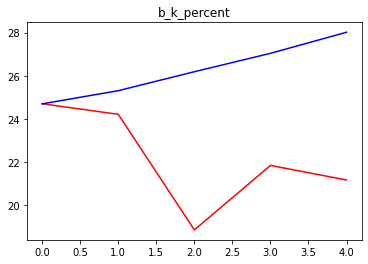

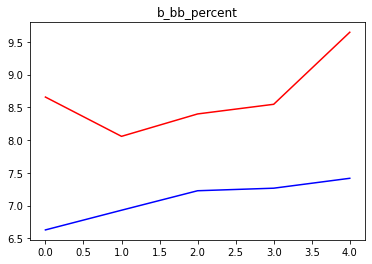

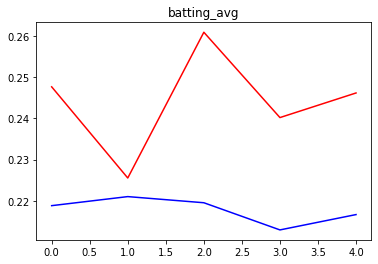

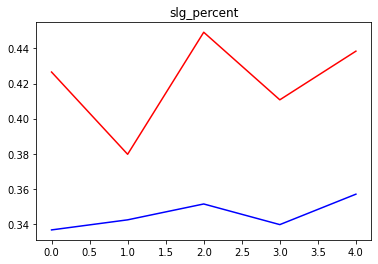

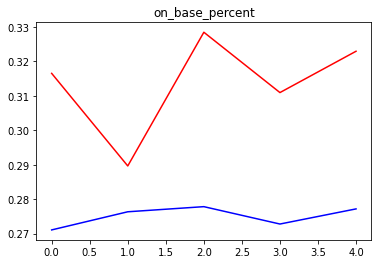

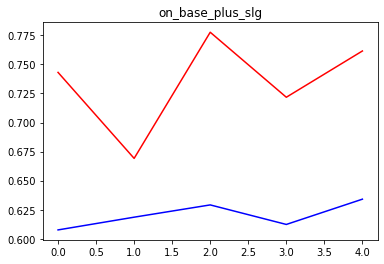

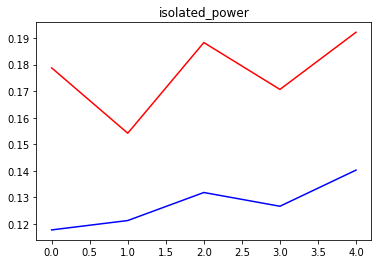

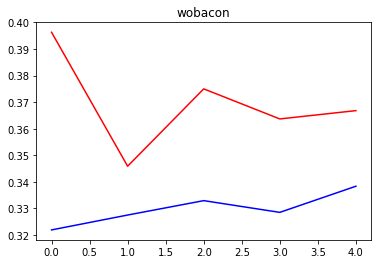

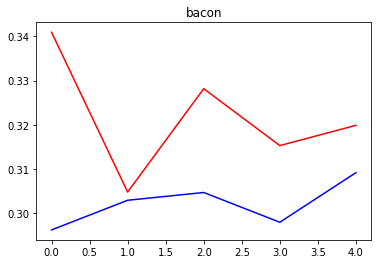

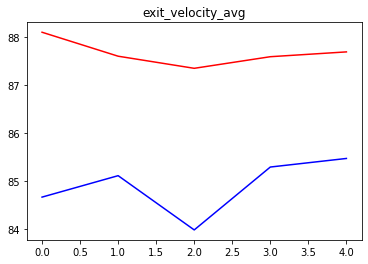

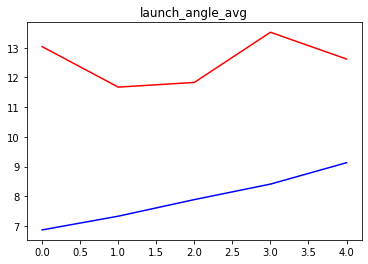

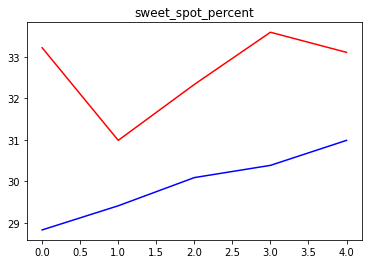

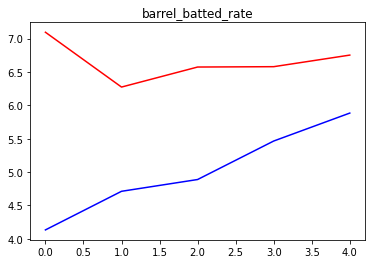

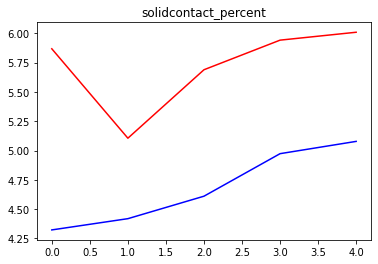

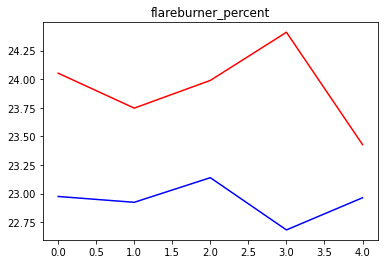

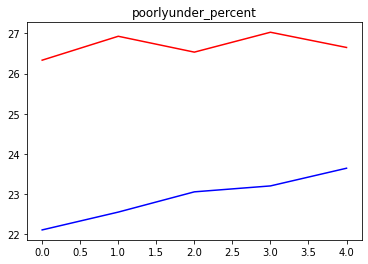

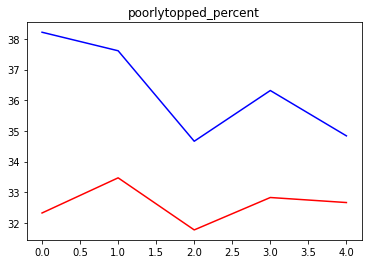

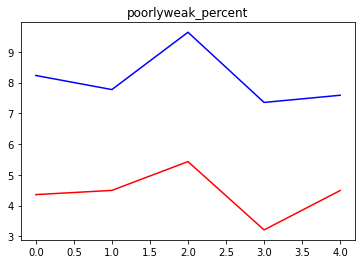

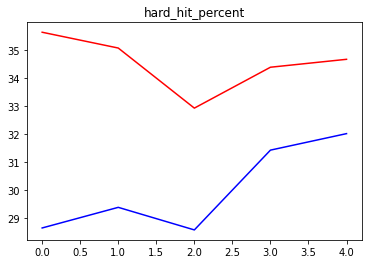

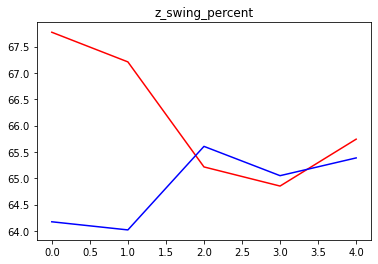

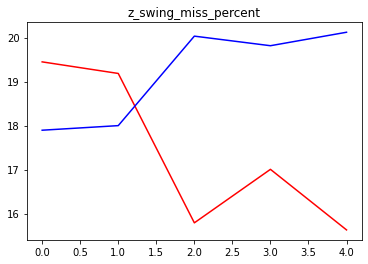

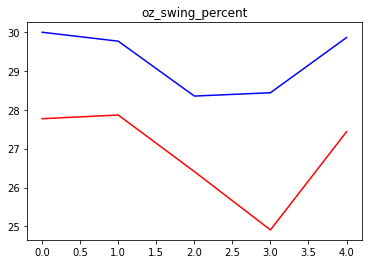

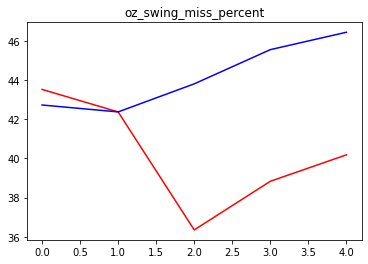

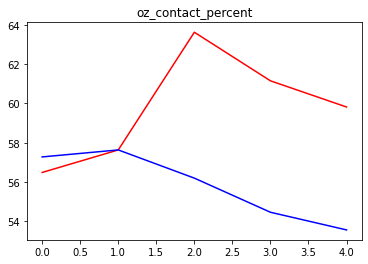

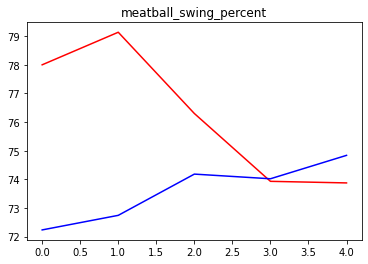

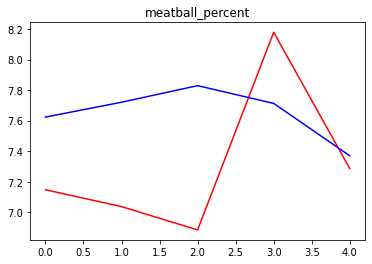

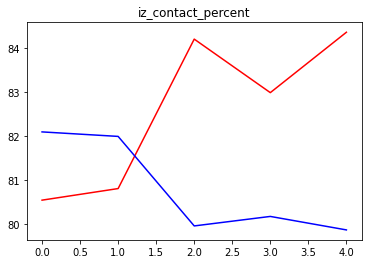

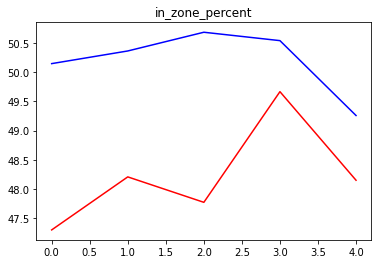

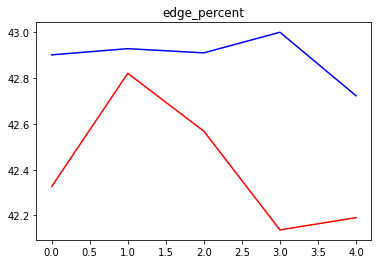

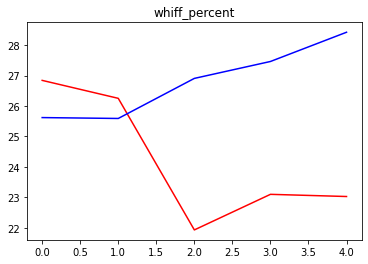

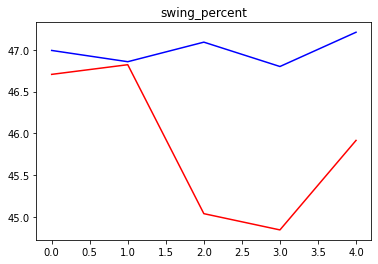

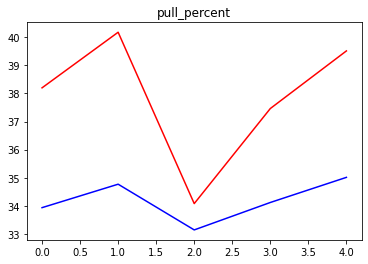

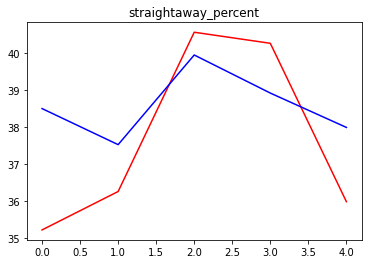

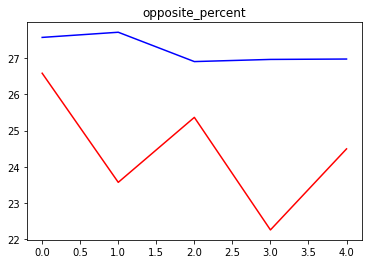

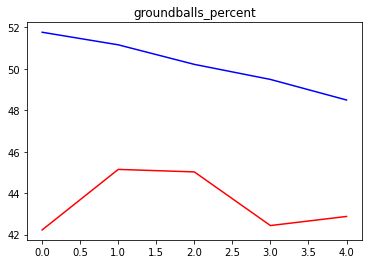

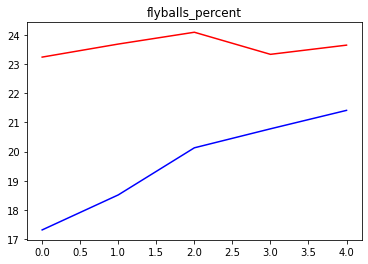

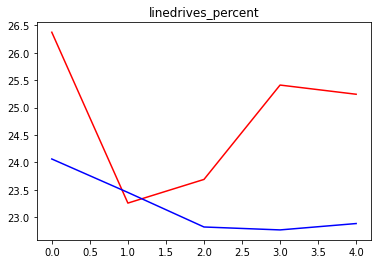

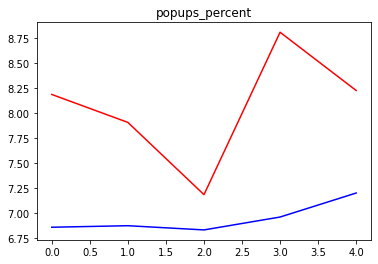

In [24]:
# Produces charts that compare the MLB's average stats and the Astros' hitters stats over the years 2015-2019 visually. The x-axis is years, but the scale is incorrect. The y-axis is the respective stat being visualized.
# The reason that I compare the Astros' stats against the MLB's average stats is to determine if any changes in the Astro's stats are unique to them, and not just a general trend in the entire league. For example, if we were looking at slugging percentage and the Astros experienced an average increase of .023 points of slugging in 2019, we may be tempted to say that that increase was due to a new type of cheating that they implemented that year. But if in 2019 the MLB's average of slugging also incerased by .023 points, we cannot say that the Astros increase was due to something that was isolated to their team, such as a cheating scheme. We must attribute the increase in slugging then to something league-wide (juiced balls, perhaps?).
# Another thing to note is that during the years 2015-2019, the Astros were an above average team, so most of their stats are better than the league average. This is why it's important to look at the relative increases or decreases from year to year (specifically from pre-cheating 2015,2016 to post-cheating 2017,2018,2019), and not the specific numbers of stats. 
# Aditionally, it is important to keep in mind the scale of the charts when reading the data. Since the Astros' hitters data set is much smaller than the MLB's, it is prone to more volitility, so random fluctuations will occur more frequently and do not necessarily reflect a trend, especially if that increase is relatively small for the stat. For example, consider the on-base percentage chart. You can see that the Astros bounce around a bit from year to year and the changes look significant on the chart. In fact, it looks like the Astros were better at getting on base after 2017. But keep in mind the scale. From 2016 to 2017, the Astros only expereinced a 0.04 point increase in their on-base percentage - hardly a significant change. Even though the chart appears to communicate that the Astros benefitted greatly from their cheating in terms of getting on base, this is not the case. 
# Some important context: the Astros started cheating in 2017, which is the middle data point on the following charts.
print("COMPARE CHARTS")
for stat_index in range(len(astros_hitters_all_stats)):
    temp = plt.pyplot.figure()
    plt.pyplot.plot(astros_hitters_all_stats[stat_index], 'r') #Astros in red
    plt.pyplot.plot(mlb_all_stats[stat_index], 'b') #mlb in blue
    plt.pyplot.title(testing_columns[stat_index])

In [25]:
# From the above charts, it appears the Astros' benefit from cheating was reflected most in the following stats: K-percentage, zone swing percentage, zone swing and miss percentage, out of zone swing and miss percentage, out of zone contact percentage, meatball swing percentage, in zone contact percentage, whiff percentage
# It is worth noting that for the swing percentage stats, we know that those changes were a result of the Astros' cheating and not because the Astros just happened to see more of that certain type of pitch thanks to the edge percentage, in zone percentage, meatball percentage, etc charts. The values for those year to year are pretty on par with MLB averages, which is what one would expect. The season is long and the rule of averages comes into effect for stats that count pitches.

In [26]:
# Constructs data frames that directly compare the MLB's average stats with the Astros' average stats for each year 2015-2019
comparison_matrix_mlb = pd.DataFrame().append(mlb_all_stats).T
comparison_matrix_astro_hitters = pd.DataFrame().append(astros_hitters_all_stats).T
comparison_matrix_mlb.columns = testing_columns
comparison_matrix_astro_hitters.columns = testing_columns
comparison_matrix_combo = pd.concat([comparison_matrix_mlb, comparison_matrix_astro_hitters], ignore_index=True)
comparison_matrix_2015 = comparison_matrix_combo.iloc[[0,5]]
comparison_matrix_2016 = comparison_matrix_combo.iloc[[1,6]]
comparison_matrix_2017 = comparison_matrix_combo.iloc[[2,7]]
comparison_matrix_2018 = comparison_matrix_combo.iloc[[3,8]]
comparison_matrix_2019 = comparison_matrix_combo.iloc[[4,9]]
# Top row is mlb, bottom row is astros

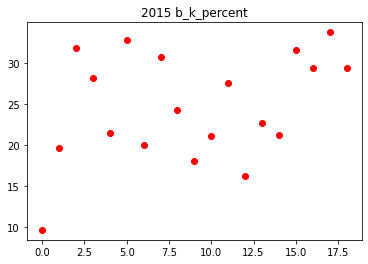

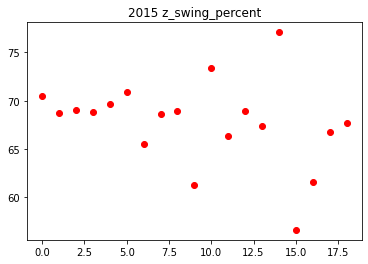

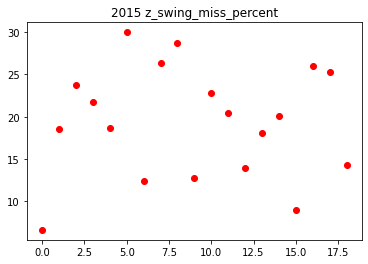

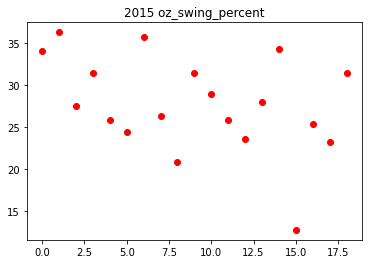

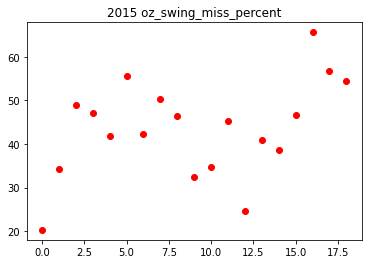

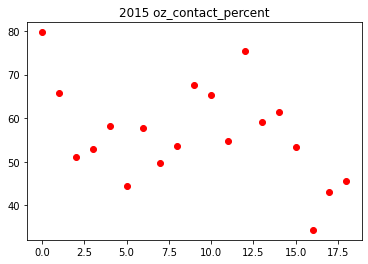

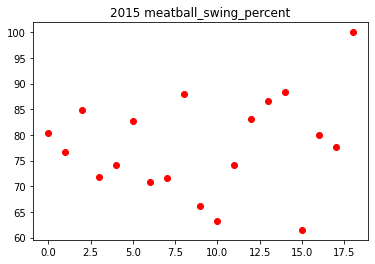

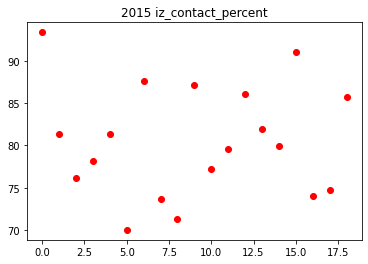

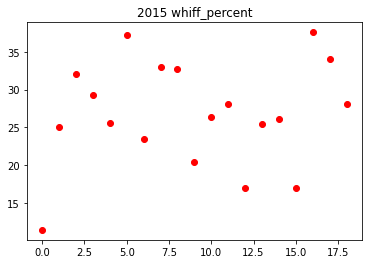

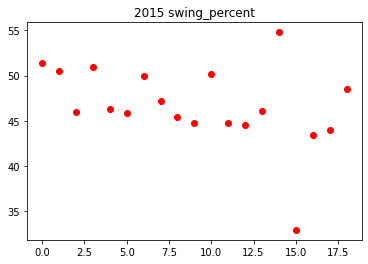

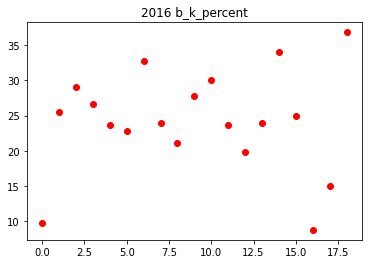

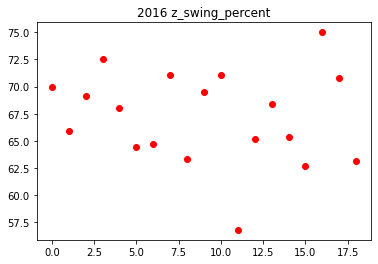

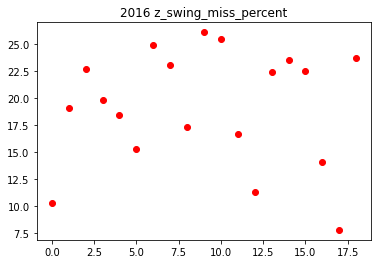

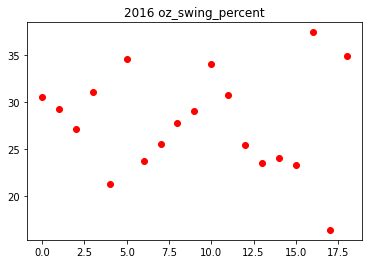

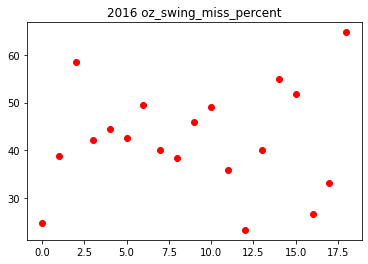

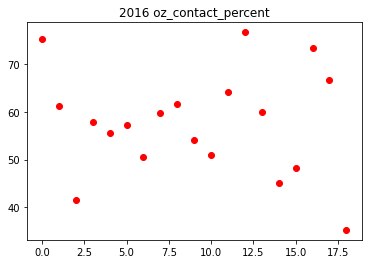

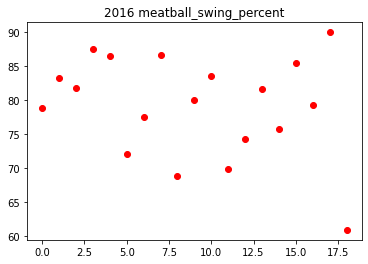

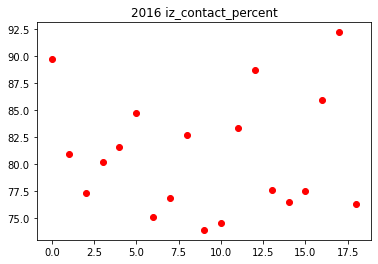

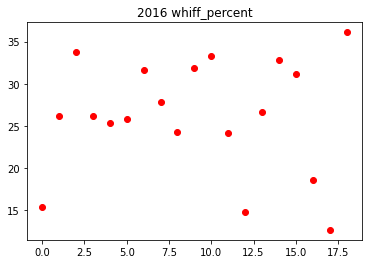

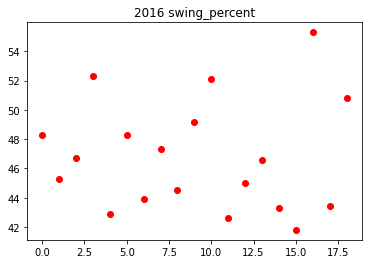

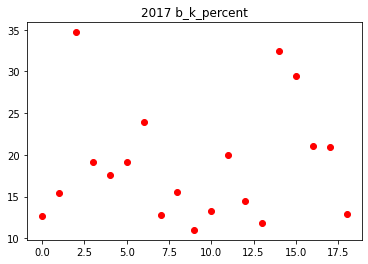

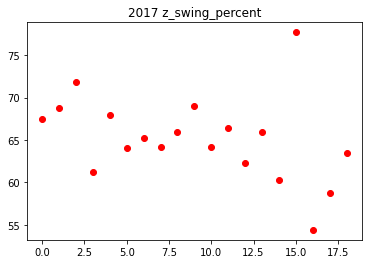

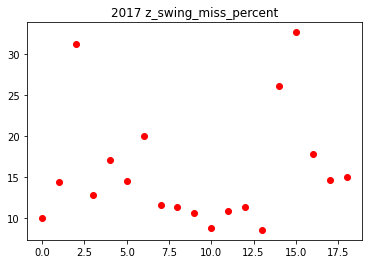

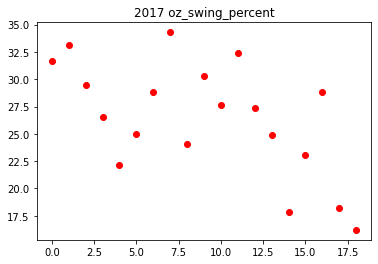

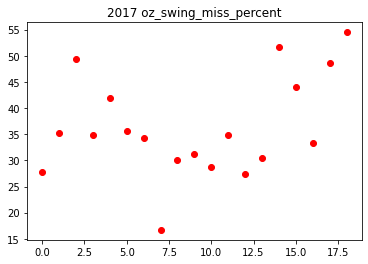

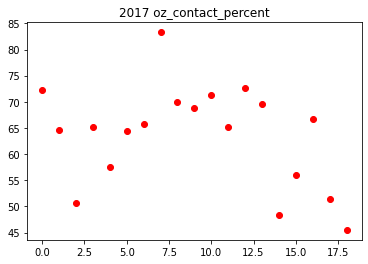

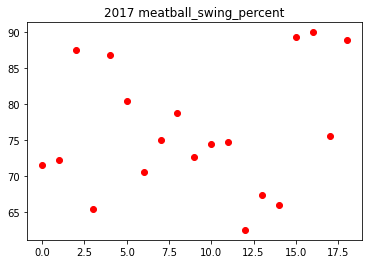

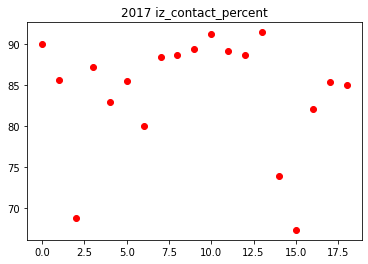

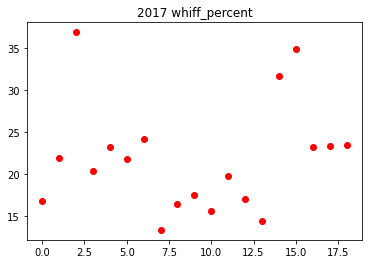

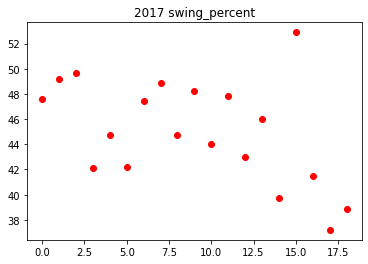

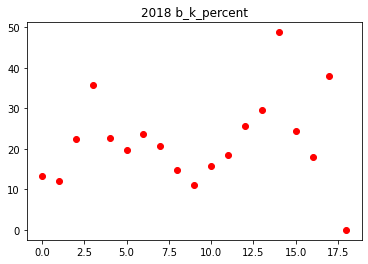

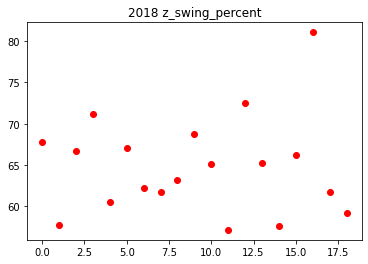

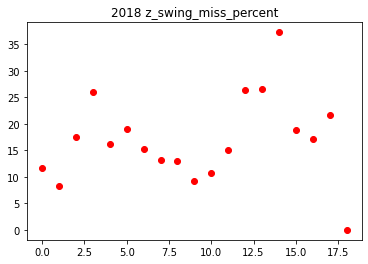

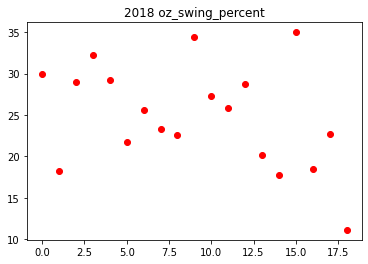

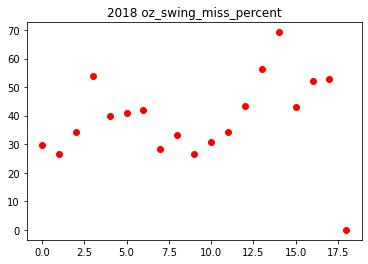

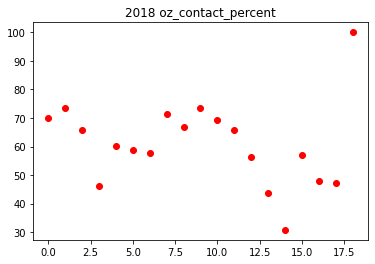

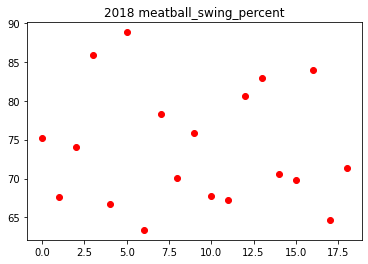

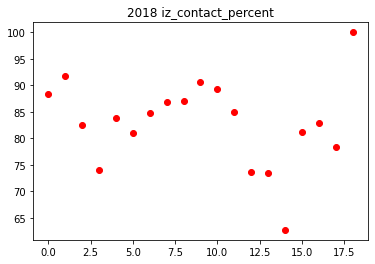

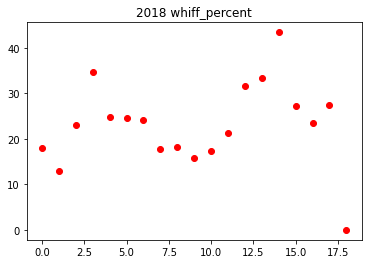

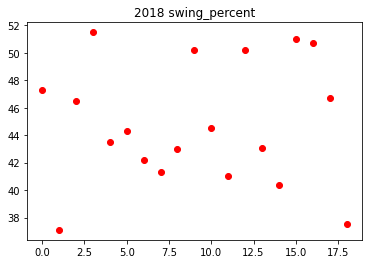

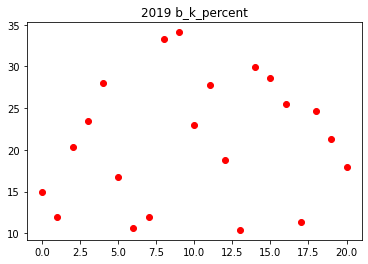

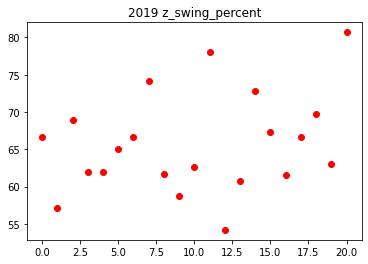

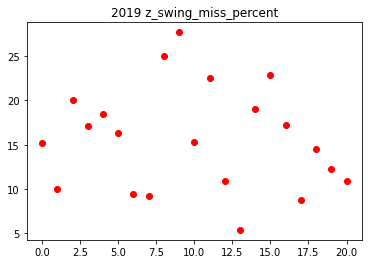

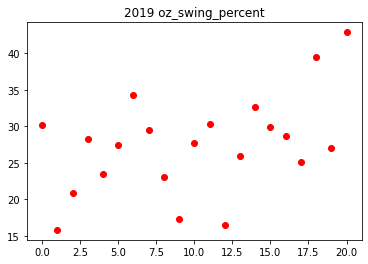

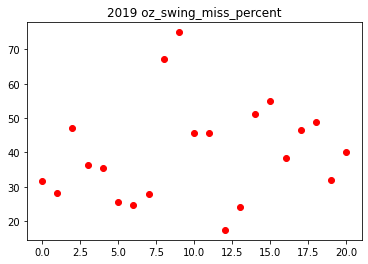

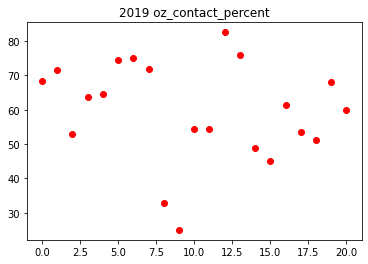

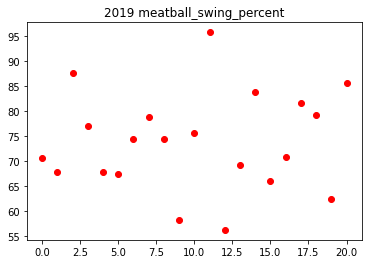

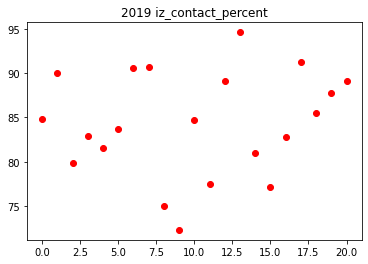

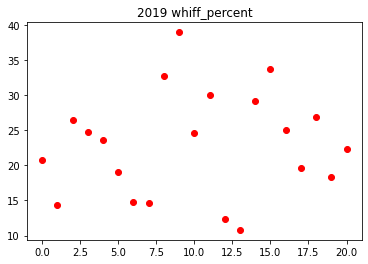

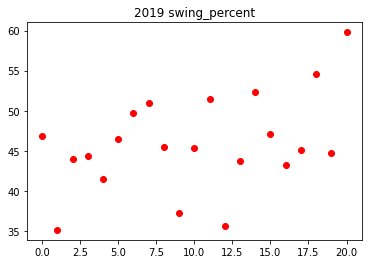

In [27]:
# The following charts detail the individual statistics of all Astro's players that had at least 100 PA's each year. I found it to be novel to visualize the spread of Astros' players, but it was not very useful.
stats_of_interest = [
'b_k_percent',
'z_swing_percent',
'z_swing_miss_percent',
'oz_swing_percent',
'oz_swing_miss_percent',
'oz_contact_percent',
'meatball_swing_percent',
'iz_contact_percent',
'whiff_percent',
'swing_percent'
]
year_count = 2015
for year_stats in astros_hitters_all_years:
    for stat in stats_of_interest:
        reindex_stats = []
        for num in year_stats[stat]:
            reindex_stats.append(num)
        temp = plt.pyplot.figure()
        plt.pyplot.plot(reindex_stats, 'or')
        title = str(year_count) + " " + stat
        plt.pyplot.title(title)
    year_count += 1
# Each dot represents one Astros player

In [28]:
# In order to determine how individual players benefitted, and not just how the team as a whole benefitted, we selected players that had been a part of the Astros pre-cheating and post-cheating. This would allow us to establish a baseline of at least one year so that we can measure their post-cheating stats against the baseline and come up with figures of benefit. We decided not to include players who had joined the Astros after 2017 who were already in the league. An argument can be made for finding those players' baselines by using their stats while they were playing for their previous team, but controling for variables is an issue then. Maybe that player benefitted more from simply changing teams or leagues and that is why they saw an increase in offensive production, and not beacuse of cheating.
# The output of this cell are the players with at least 100 PA's who were part of the Astros before the cheating started and after the cheating started.
all_players_all_years = []
for year in astros_hitters_all_years:
    for index, row in year.iterrows():
        all_players_all_years.append(row[0])
a = Counter(all_players_all_years)
persistent_players = []
for name in a:
    if a[name] > 3:
        persistent_players.append(name)
print(persistent_players)

['Altuve', 'Gattis', 'Marisnick', 'Gonzalez', 'Springer', 'Correa', 'Tucker', 'Stassi', 'White', 'Kemp', 'Bregman', 'Gurriel']


In [30]:
# Creates a dataframe of the persistent players for 2015-2019
astros_persistent_hittters = pd.DataFrame(columns=dfwh.columns)
for year in astros_hitters_all_years:
    for index, row in year.iterrows():
        if row[0] in persistent_players:
            astros_persistent_hittters = astros_persistent_hittters.append(row)
astros_persistent_hittters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Altuve,Jose,2015,25,638,689,200,141,40,4,15,67,33,9.7,4.8,0.313,0.459,0.351,0.810,0.146,66,207,293,13,38,111,662,331,434,9,154,17,0,3,9,95,18,580,85,2,108,198,51,40,30,3,6,130,11,2,0,31,7,0,745,1482,1151,2227,8,0.273,0.390,0.347,0.305,0.317,0.116,0.367,0.317,0.347,0.305,0.040,0.069,0.042,85.8,10.5,31.6,18,3.1,4.8,24.0,26.7,36.4,5.0,28.8,70.5,6.6,34.1,20.3,79.7,81,399,52.5,1170,80.4,7.3,200,1385,587,2227,93.4,49,745,47.5,1057,39.9,889,11.4,51.4,39.8,40.9,19.3,580,39.6,47.6,276,21.7,126,23.4,136,7.2,42
5,Gattis,Evan,2015,29,566,604,139,81,20,11,27,119,30,19.7,5.0,0.246,0.463,0.285,0.748,0.217,88,229,262,1,0,141,663,311,345,18,153,13,0,1,3,45,24,452,69,1,78,178,27,43,12,0,5,265,1,0,0,0,0,0,729,1373,1062,2102,1,0.247,0.415,0.317,0.301,0.288,0.168,0.375,0.355,0.308,0.311,-0.001,0.048,0.016,88.9,10.3,29.9,32,7.1,7.3,21.9,25.0,35.4,3.3,39.2,68.7,18.6,36.3,34.3,65.7,147,429,56.2,1181,76.7,5.7,279,1132,656,2102,81.4,118,633,43.8,921,42.5,893,25.0,50.5,36.9,40.5,22.6,452,35.8,46.5,210,22.6,102,21.2,96,9.7,44
7,Marisnick,Jake,2015,24,339,372,80,52,15,4,9,105,18,28.2,4.8,0.236,0.383,0.277,0.660,0.147,36,147,130,9,24,88,442,211,278,20,133,2,0,1,5,30,10,244,40,0,44,82,22,18,0,6,4,216,6,2,1,19,5,0,484,965,754,1449,3,0.229,0.354,0.288,0.277,0.275,0.125,0.376,0.358,0.336,0.327,0.007,0.029,0.011,83.1,11.2,32.4,13,5.3,3.3,24.2,25.8,32.4,9.0,26.2,68.8,21.8,31.5,47.0,53.0,103,219,48.0,695,71.9,8.4,174,887,375,1449,78.2,113,519,52.0,754,44.4,644,29.3,50.9,38.5,33.2,28.3,244,32.8,45.1,110,22.1,54,25.4,62,7.4,18
10,Gonzalez,Marwin,2015,26,344,370,96,65,18,1,12,74,16,20.0,4.3,0.279,0.442,0.311,0.753,0.163,34,136,152,5,4,77,394,211,223,8,120,9,0,2,3,37,10,277,49,0,36,105,25,24,0,7,0,154,5,0,0,3,1,0,426,884,673,1310,0,0.255,0.377,0.329,0.295,0.294,0.120,0.393,0.348,0.356,0.326,0.024,0.065,0.034,86.5,9.1,31.8,10,3.6,5.8,27.4,23.1,33.9,6.1,34.3,65.5,12.4,35.7,42.2,57.8,103,244,52.2,684,70.9,8.4,242,735,327,1310,87.6,51,410,47.8,626,41.4,542,23.5,49.9,44.4,37.5,18.1,277,30.3,48.0,133,16.6,46,26.7,74,8.7,24
12,Springer,George,2015,26,388,451,107,70,19,2,16,109,50,24.2,11.1,0.276,0.459,0.366,0.825,0.183,41,138,178,4,16,82,677,244,263,18,102,4,0,2,8,33,12,284,62,0,43,102,23,13,0,2,3,266,4,0,0,14,2,0,730,1060,816,1790,3,0.275,0.468,0.360,0.363,0.368,0.193,0.432,0.435,0.379,0.380,0.001,-0.009,-0.003,89.6,8.8,36.3,28,9.9,6.0,25.7,20.4,33

In [31]:
stats_of_interest_plus = stats_of_interest.copy()
stats_of_interest_plus.insert(0,"last_name")
print(stats_of_interest_plus)

['last_name', 'b_k_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent', 'iz_contact_percent', 'whiff_percent', 'swing_percent']


In [32]:
# The following cells calculate the hitters of interest's averages of all stats for the pre-cheating years: 2015, 2016
astros_persistent_hitters_averages_precheat = pd.DataFrame(columns=stats_of_interest_plus)
astros_persistent_hitters_averages_precheat_dict = {}
for name in persistent_players:
    astros_persistent_hitters_averages_precheat_dict[name] = []
for stat in stats_of_interest:
    for name in persistent_players:
        stat_years_list_per_player = []
        for year in astros_hitters_all_years[:2]: #first two years without cheating
            for index, row in year.iterrows():
                if row[0] == name:
                    stat_years_list_per_player.append(row.loc[stat])
        stat_avg = sum(stat_years_list_per_player)/len(stat_years_list_per_player)
        astros_persistent_hitters_averages_precheat_dict[name].append((stat, stat_avg))

In [33]:
index_count = 0
for key in astros_persistent_hitters_averages_precheat_dict.keys():
    temp = []
    for i in astros_persistent_hitters_averages_precheat_dict[key]:
        temp.append(i[1])
    astros_persistent_hitters_averages_precheat.loc[index_count] = [key] + temp
    index_count += 1

In [34]:
astros_persistent_hitters_averages_precheat

,last_name,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
0,Altuve,9.75,70.25,8.45,32.30,22.60,77.40,79.60,91.55,13.40,49.85
1,Gattis,22.60,67.30,18.85,32.75,36.60,63.40,79.95,81.15,25.60,47.90
2,Marisnick,27.45,70.65,20.80,31.30,44.55,55.45,79.75,79.20,27.75,51.60
3,Gonzalez,21.40,64.95,13.85,35.15,42.45,57.55,71.50,86.15,24.65,49.10
4,Springer,24.05,70.00,25.90,23.20,43.30,56.70,87.30,74.10,30.30,46.35
5,Correa,19.60,62.30,15.05,29.60,35.40,64.60,67.45,84.95,22.35,44.60
6,Tucker,24.45,71.45,24.45,28.95,40.30,59.70,71.65,75.55,29.15,49.70
7,Stassi,29.40,67.70,14.30,31.40,54.50,45.50,100.00,85.70,28.10,48.50
8,White,23.60,56.80,16.70,30.70,35.90,64.10,69.90,83.30,24.20,42.60
9,Kemp,19.90,65.20,11.30,25.40,23.40,76.60,74.30,88.70,14.80,45.00


In [35]:
# The following cells calculate the hitters of interest's averages of all stats for the post-cheating years: 2017,2018,2019
astros_persistent_hitters_averages_postcheat = pd.DataFrame(columns=stats_of_interest_plus)
astros_persistent_hitters_averages_postcheat_dict = {}
for name in persistent_players:
    astros_persistent_hitters_averages_postcheat_dict[name] = []
for stat in stats_of_interest:
    for name in persistent_players:
        stat_years_list_per_player = []
        for year in astros_hitters_all_years[2:]: #final three years with cheating
            for index, row in year.iterrows():
                if row[0] == name:
                    stat_years_list_per_player.append(row.loc[stat])
        stat_avg = sum(stat_years_list_per_player)/len(stat_years_list_per_player)
        astros_persistent_hitters_averages_postcheat_dict[name].append((stat, stat_avg))

In [36]:
index_count = 0
for key in astros_persistent_hitters_averages_postcheat_dict.keys():
    temp = []
    for i in astros_persistent_hitters_averages_postcheat_dict[key]:
        temp.append(i[1])
    astros_persistent_hitters_averages_postcheat.loc[index_count] = [key] + temp
    index_count += 1

In [37]:
astros_persistent_hitters_averages_postcheat

,last_name,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
0,Altuve,13.633333,67.300000,12.266667,30.633333,29.800000,70.200000,72.466667,87.733333,18.500000,47.233333
1,Gattis,18.900000,67.750000,15.950000,31.050000,34.800000,65.200000,73.100000,84.050000,22.550000,47.850000
2,Marisnick,33.433333,71.933333,25.433333,31.466667,51.466667,48.533333,85.766667,74.566667,33.600000,51.166667
3,Gonzalez,21.000000,60.850000,14.500000,27.850000,37.400000,62.600000,66.050000,85.500000,22.600000,42.800000
4,Springer,19.200000,68.000000,18.766667,21.533333,43.366667,56.400000,87.766667,81.233333,24.800000,44.333333
5,Correa,22.066667,62.733333,15.633333,26.266667,38.000000,62.000000,73.666667,84.366667,23.566667,42.900000
6,Tucker,22.950000,79.600000,19.850000,24.400000,48.750000,51.250000,89.900000,80.150000,26.750000,51.050000
7,Stassi,25.266667,63.466667,22.200000,19.766667,59.400000,40.600000,82.100000,77.800000,29.900000,42.466667
8,White,24.200000,62.933333,17.233333,25.166667,32.666667,67.333333,72.233333,82.766667,21.866667,43.366667
9,Kemp,14.833333,64.133333,13.633333,28.133333,25.200000,74.800000,70.866667,86.366667,16.933333,46.133333


In [38]:
# This data frame shows the difference in stats from the post-cheating years to the pre-cheating years of the players of interest
astros_persistent_hitters_averages_differences_prepost_cheat = astros_persistent_hitters_averages_postcheat.set_index('last_name').subtract(astros_persistent_hitters_averages_precheat.set_index('last_name'), fill_value=0)
astros_persistent_hitters_averages_differences_prepost_cheat

,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
last_name,,,,,,,,,,
Altuve,3.883333,-2.950000,3.816667,-1.666667,7.200000,-7.200000,-7.133333,-3.816667,5.100000,-2.616667
Gattis,-3.700000,0.450000,-2.900000,-1.700000,-1.800000,1.800000,-6.850000,2.900000,-3.050000,-0.050000
Marisnick,5.983333,1.283333,4.633333,0.166667,6.916667,-6.916667,6.016667,-4.633333,5.850000,-0.433333
Gonzalez,-0.400000,-4.100000,0.650000,-7.300000,-5.050000,5.050000,-5.450000,-0.650000,-2.050000,-6.300000
Springer,-4.850000,-2.000000,-7.133333,-1.666667,0.066667,-0.300000,0.466667,7.133333,-5.500000,-2.016667
Correa,2.466667,0.433333,0.583333,-3.333333,2.600000,-2.600000,6.216667,-0.583333,1.216667,-1.700000
Tucker,-1.500000,8.150000,-4.600000,-4.550000,8.450000,-8.450000,18.250000,4.600000,-2.400000,1.350000
Stassi,-4.133333,-4.233333,7.900000,-11.633333,4.900000,-4.900000,-17.900000,-7.900000,1.800000,-6.033333
White,0.600000,6.133333,0.533333,-5.533333,-3.233333,3.233333,2.333333,-0.533333,-2.333333,0.766667


In [39]:
# This calculates the average differnce in each stat from post-cheat to pre-cheat of the players of interest
astros_persistent_hitters_averages_differences_prepost_cheat.mean()

b_k_percent              -1.287500
z_swing_percent          -1.077778
z_swing_miss_percent     -0.918056
oz_swing_percent         -3.584722
oz_swing_miss_percent     0.915278
oz_contact_percent       -0.934722
meatball_swing_percent   -1.895833
iz_contact_percent        0.918056
whiff_percent            -1.161111
swing_percent            -2.455556
dtype: float64

In [40]:
# Some commentary on the above cell:
# It's notable that on average the selected Astros hitters did not benefit too much from their cheating. This can be misleading. While these selected hitters may not have benefitted on average, the benefits that some players saw in certain stats do show a significant benefit from cheating. Small sample size and the law of averages distort the results here.

In [41]:
# Shows the maximum increase that any individual player saw in each stat pre-cheat to post-cheat, as you can see, some of the increases are substantial
astros_persistent_hitters_averages_differences_prepost_cheat.max()

b_k_percent                5.983333
z_swing_percent            8.150000
z_swing_miss_percent       7.900000
oz_swing_percent           2.733333
oz_swing_miss_percent      8.450000
oz_contact_percent        11.700000
meatball_swing_percent    18.250000
iz_contact_percent        12.533333
whiff_percent              5.850000
swing_percent              1.350000
dtype: float64

In [42]:
# Shows the maximum increase that any individual player saw in each stat pre-cheat to post-cheat, as you can see, some of the decreases are substantial
astros_persistent_hitters_averages_differences_prepost_cheat.min()

b_k_percent              -10.800000
z_swing_percent           -8.133333
z_swing_miss_percent     -12.533333
oz_swing_percent         -11.633333
oz_swing_miss_percent    -11.700000
oz_contact_percent        -8.450000
meatball_swing_percent   -17.900000
iz_contact_percent        -7.900000
whiff_percent            -12.133333
swing_percent             -7.633333
dtype: float64

In [43]:
# This names the players associated with the maximum increase shown in the cells above
index_count = 1
for i  in astros_persistent_hitters_averages_differences_prepost_cheat.max():
    print(stats_of_interest_plus[index_count])
    print(astros_persistent_hitters_averages_differences_prepost_cheat.loc[astros_persistent_hitters_averages_differences_prepost_cheat[stats_of_interest_plus[index_count]] == i].index[0])
    index_count += 1
    print("______________")

b_k_percent
Marisnick
______________
z_swing_percent
Tucker
______________
z_swing_miss_percent
Stassi
______________
oz_swing_percent
Kemp
______________
oz_swing_miss_percent
Tucker
______________
oz_contact_percent
Bregman
______________
meatball_swing_percent
Tucker
______________
iz_contact_percent
Bregman
______________
whiff_percent
Marisnick
______________
swing_percent
Tucker
______________


In [44]:
# This names the players associated with the maximum decrease shown in the cells above
index_count = 1
for i  in astros_persistent_hitters_averages_differences_prepost_cheat.min():
    print(stats_of_interest_plus[index_count])
    print(astros_persistent_hitters_averages_differences_prepost_cheat.loc[astros_persistent_hitters_averages_differences_prepost_cheat[stats_of_interest_plus[index_count]] == i].index[0])
    index_count += 1
    print("______________")

b_k_percent
Bregman
______________
z_swing_percent
Bregman
______________
z_swing_miss_percent
Bregman
______________
oz_swing_percent
Stassi
______________
oz_swing_miss_percent
Bregman
______________
oz_contact_percent
Tucker
______________
meatball_swing_percent
Stassi
______________
iz_contact_percent
Stassi
______________
whiff_percent
Bregman
______________
swing_percent
Bregman
______________


In [45]:
# A few notes:
# Bregman appears to have benefitted the most of any hitter, while some hitters appear to have actually be harmed by the cheating, that is, harmed in offensive production. Every Astros' integrity and character has obviously been incredibly damaged. 

In [46]:
astros_persistent_hitters_averages_differences_prepost_cheat.loc[:,"b_k_percent":"oz_contact_percent"]

,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent
last_name,,,,,,
Altuve,3.883333,-2.950000,3.816667,-1.666667,7.200000,-7.200000
Gattis,-3.700000,0.450000,-2.900000,-1.700000,-1.800000,1.800000
Marisnick,5.983333,1.283333,4.633333,0.166667,6.916667,-6.916667
Gonzalez,-0.400000,-4.100000,0.650000,-7.300000,-5.050000,5.050000
Springer,-4.850000,-2.000000,-7.133333,-1.666667,0.066667,-0.300000
Correa,2.466667,0.433333,0.583333,-3.333333,2.600000,-2.600000
Tucker,-1.500000,8.150000,-4.600000,-4.550000,8.450000,-8.450000
Stassi,-4.133333,-4.233333,7.900000,-11.633333,4.900000,-4.900000
White,0.600000,6.133333,0.533333,-5.533333,-3.233333,3.233333


In [47]:
astros_persistent_hitters_averages_differences_prepost_cheat.loc[:,"meatball_swing_percent":"swing_percent"]

,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
last_name,,,,
Altuve,-7.133333,-3.816667,5.100000,-2.616667
Gattis,-6.850000,2.900000,-3.050000,-0.050000
Marisnick,6.016667,-4.633333,5.850000,-0.433333
Gonzalez,-5.450000,-0.650000,-2.050000,-6.300000
Springer,0.466667,7.133333,-5.500000,-2.016667
Correa,6.216667,-0.583333,1.216667,-1.700000
Tucker,18.250000,4.600000,-2.400000,1.350000
Stassi,-17.900000,-7.900000,1.800000,-6.033333
White,2.333333,-0.533333,-2.333333,0.766667


In [48]:
# We've seen how much they did benefit, now how much should they have benefitted?
# I used a linear regression model to associate changes in some stats with changes in other stats. The questions I wish to answer are of the form, "How much is an increase/decrease of _______ in ______ worth in terms of ______". For example, I ask, "How much is a decrease of 10% worth in terms of on base percentage?". By using a linear regression model and the MLB's league-wide averages, I can find relationships between selected stats, and then determine how much the benefit the Astros hitters saw in certain stats should have translated to other stats. For example, how much should Alex Bregman's 10% decrease in K-percentage be worth in terms of on base percentage?
print("testing columns")
print(testing_columns)
print()
print("stats of interest")
print(stats_of_interest)

testing columns
['b_k_percent', 'b_bb_percent', 'batting_avg', 'slg_percent', 'on_base_percent', 'on_base_plus_slg', 'isolated_power', 'wobacon', 'bacon', 'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent', 'meatball_percent', 'iz_contact_percent', 'in_zone_percent', 'edge_percent', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent', 'opposite_percent', 'groundballs_percent', 'flyballs_percent', 'linedrives_percent', 'popups_percent']

stats of interest
['b_k_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent', 'iz_contact_percent', 'whiff_percent', 'swing_percent']


In [49]:
# The following displays the charts 
x_categories = ['b_k_percent','exit_velocity_avg','launch_angle_avg']
y_categories = [['on_base_percent','slg_percent'],['barrel_batted_rate'],['isolated_power','slg_percent']]

for year in range(0,5):
    idx = 0
    for x_category in x_categories:
        for y_category in y_categories[idx]:
            print
            print('X: ', x_category)
            print('Y: ', y_category)
            x = mlb_all_years[year][[x_category]]
            y = mlb_all_years[year][y_category]
            x_train = x[:-int(len(x)*0.2)]
            x_test = x[-int(len(x)*0.2):]
            y_train = y[:-int(len(y)*0.2)]
            y_test = y[-int(len(y)*0.2):]
            reg = LinearRegression()
            reg.fit(x_train, y_train)
            y_pred = reg.predict(x_test)
            print('Score: ', reg.score(x, y))
            print('Coefficients: \n', reg.coef_)
            print('Mean squared error: %.2f'
                  % mean_squared_error(y_test, y_pred))
            print('Coefficient of determination: %.2f'
                  % r2_score(y_test, y_pred))

            plt.pyplot.scatter(x_test, y_test,  color='black')
            plt.pyplot.plot(x_test, y_pred, color='blue', linewidth=3)

            plt.pyplot.xticks(())
            plt.pyplot.yticks(())

            plt.pyplot.show()

        idx += 1


X:  b_k_percent
Y:  on_base_percent


NameError: name 'LinearRegression' is not defined

In [50]:
# Some commentary:
# Although the coefficeints of determination do not seem very high for these fits, I would argue that they are better fits than the R^2 value would lead you to believe. The variability of certain stasts is very high in the MLB. There are outstanding players, and downright terrible players. This leads to many data points that fall far from the line of regression, but as long as that line of regression follows the prevalant trend of the data, I believe that it can be trusted for the most part. Since the data set is rather large, and since the regression lines typically do follow the trends of the data, in general I have confidence that one can use the slope of the linear regression lines to draw loose conclusions about the relationships between stats. For example, I don't think it's ridiculous to claim that every 1% increase in k-rate will lower your on base percentage by roughly 0.005 points. Granted the error in this claim may be large, but since we are looking at relatively small changes in k-rate (max 10% change) I believe that the results shown here can be largely trusted. 